### Question to answer: what are the most in-demand skills for the top three Data Roles identified in the EDA section, respectively?

In the previous section we found that the top three Data Roles are:
1. Data Analyst
2. Data Engineer
3. Data Scientist

Now we filter our data for these three jobs, individually, and extract corresponding top skills.

In [1]:
#Importing libraries and data, cleaning data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

df_US = df[(df['job_country'] == "United States")]
df_skills = df
df_skills_count = df_ski
df_US['job_title_short'].value_counts().reset_index(name='jobs_total')


### 1. Data Analyst

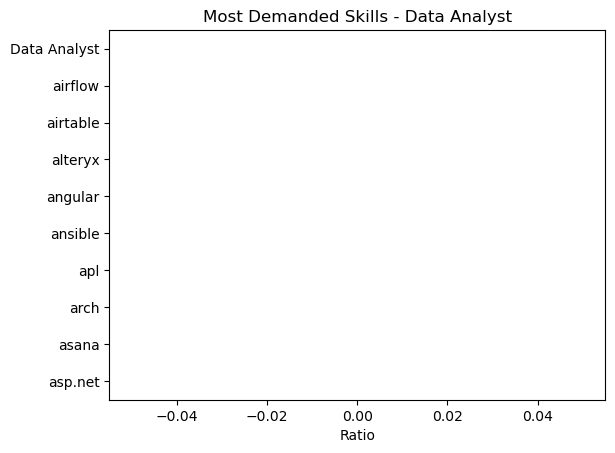

In [7]:
df_skills_analyst = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].explode('job_skills')
total_skills_analyst = df_skills_analyst['job_title_short'].value_counts()
(df_skills_analyst['job_skills'].value_counts()/total_skills_analyst).head(10).plot(kind='barh', color="green")
plt.title("Most Demanded Skills - Data Analyst")
plt.xlabel("Ratio")
plt.ylabel('')
ax = plt.gca()
ax.invert_yaxis()

In [6]:
total_skills_analyst #Nije u skladu s Lukeovim podacima (count nije isti)

job_skills
sql                34452
excel              27519
tableau            19311
python             18382
sas                13200
                   ...  
microsoft lists        1
google chat            1
capacitor              1
ionic                  1
fastapi                1
Name: count, Length: 218, dtype: int64

### 2. Data Engineer

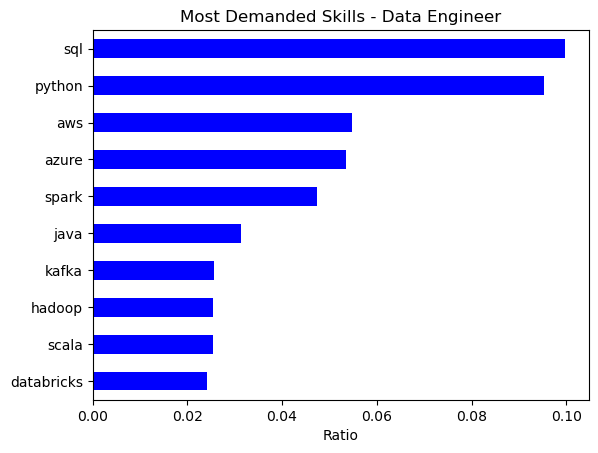

In [4]:
df_skills_engineer = df[df['job_title_short'] == "Data Engineer"].explode('job_skills')
total_skills_engineer = df_skills_engineer['job_skills'].count()
(df_skills_engineer['job_skills'].value_counts()/total_skills_engineer).head(10).plot(kind='barh', color="blue")
plt.title("Most Demanded Skills - Data Engineer")
plt.xlabel("Ratio")
plt.ylabel('')
ax = plt.gca()
ax.invert_yaxis()

### 3. Data Scientist

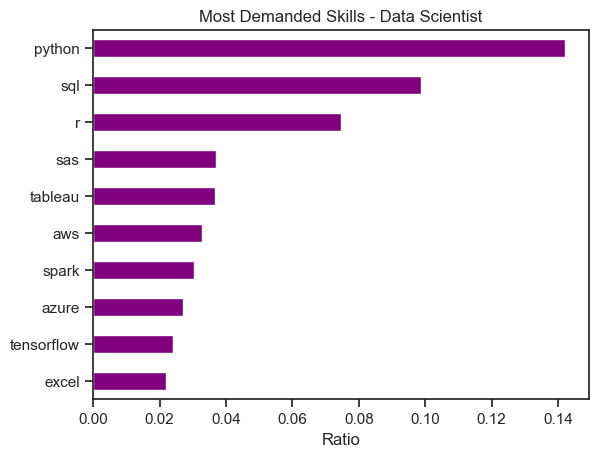

In [147]:
df_skills_scientist = df[df['job_title_short'] =="Data Scientist"].explode('job_skills')
total_skills_scientist = df_skills_scientist['job_skills'].count()
(df_skills_scientist['job_skills'].value_counts()/total_skills_scientist).head(10).plot(kind='barh', color="purple")
plt.title("Most Demanded Skills - Data Scientist")
plt.xlabel("Ratio")
plt.ylabel('')
ax = plt.gca()
ax.invert_yaxis()

### Plotting everything together using Seaborn library

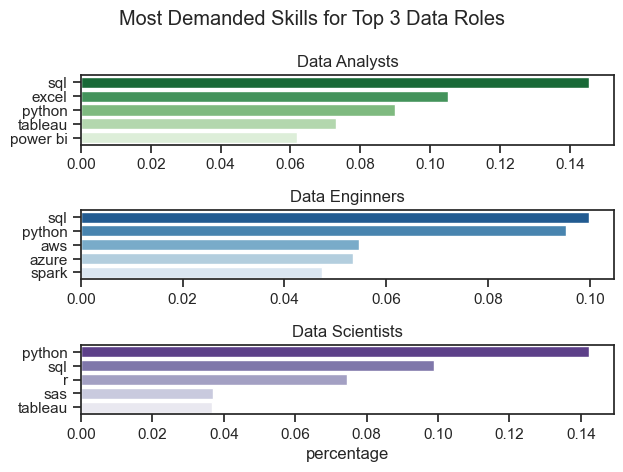

In [148]:
df_skills_analyst = (df_skills_analyst['job_skills'].value_counts()/total_skills_analyst ).head(5).reset_index(name="percentage").copy()
df_skills_engineer = (df_skills_engineer['job_skills'].value_counts()/total_skills_engineer).head(5).reset_index(name="percentage").copy()
df_skills_scientist = (df_skills_scientist['job_skills'].value_counts()/total_skills_scientist).head(5).reset_index(name="percentage").copy()

fig, ax = plt.subplots(3, 1)  
sns.set_theme(style='ticks')

sns.barplot(data=df_skills_analyst, x='percentage', y='job_skills', ax=ax[0], hue='job_skills', palette='Greens_r') 
sns.barplot(data=df_skills_engineer, x='percentage', y='job_skills', ax=ax[1], hue='job_skills', palette="Blues_r")
sns.barplot(data=df_skills_scientist, x='percentage', y='job_skills', ax=ax[2], hue='job_skills', palette='Purples_r')

ax[0].set_title('Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

ax[1].set_title('Data Enginners')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

ax[2].set_title('Data Scientists')
ax[2].set_ylabel('')
ax[2].set_xlabel('percentage')

fig.suptitle("Most Demanded Skills for Top 3 Data Roles")
fig.tight_layout()
plt.show()